## Predicting Bike Sharing Demand:

**Objective:** Predict the demand for bike-sharing services in a city based on features like temperature, humidity, wind speed, and time of day.

**Techniques:** Linear Regression, Decision Trees, Random Forest.

**Tools:** Python, Scikit-Learn, Pandas, Seaborn/Matplotlib.

**Dataset:** Bike Sharing dataset from UCI or Kaggle.

**General Project Execution Steps:**

Data Collection: Source or create the dataset needed for the project.

Data Preprocessing: Clean, transform, and prepare the data for modeling.

EDA: Analyze the data to understand distributions and relationships.

Model Development: Train machine learning models to predict the target variable.

Model Evaluation: Use appropriate metrics to evaluate the performance of your model.

Optimization: Fine-tune the model through hyperparameter tuning.

API: Pickle the model file and Create user testing API using any web framework for demonstration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv("hour.csv")

In [4]:
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
data.shape

(17379, 17)

In [7]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
data.info

<bound method DataFrame.info of        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0

In [9]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
data.duplicated().sum()

np.int64(0)

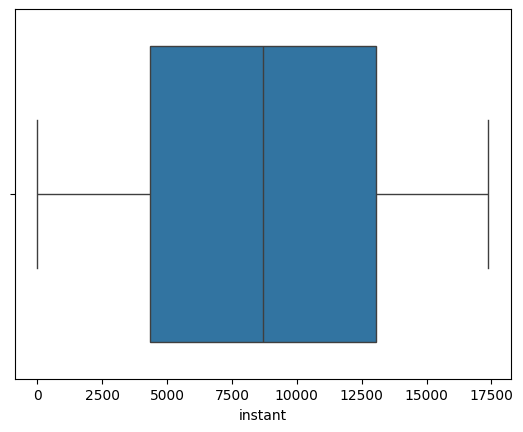

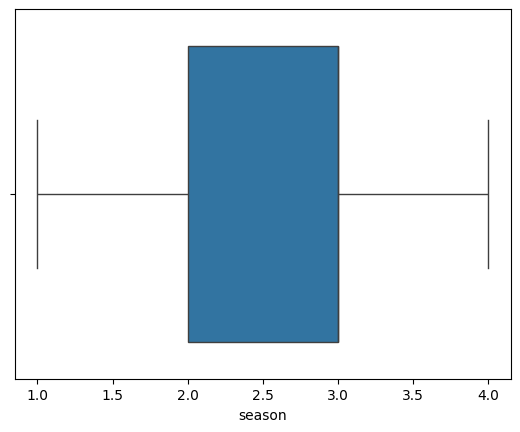

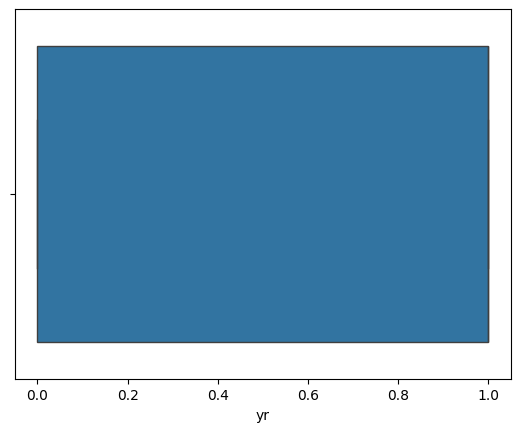

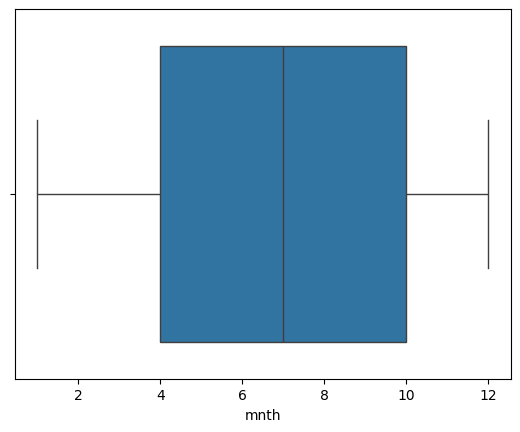

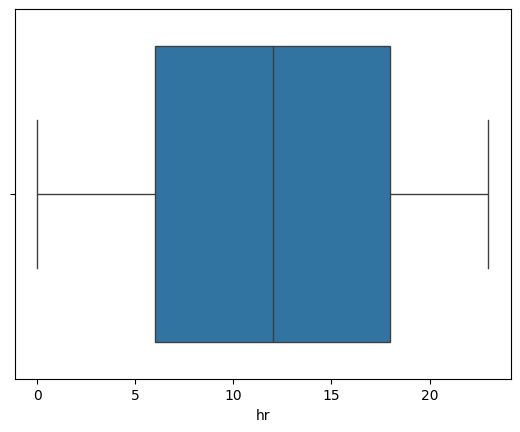

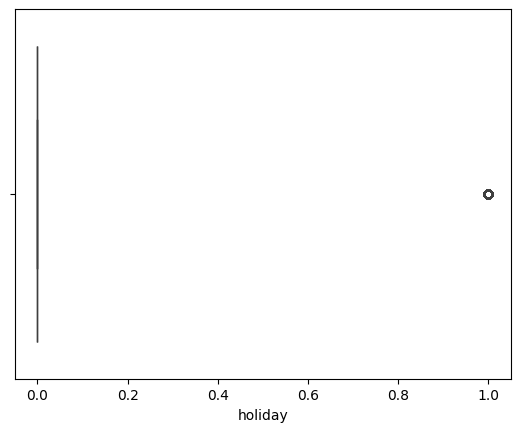

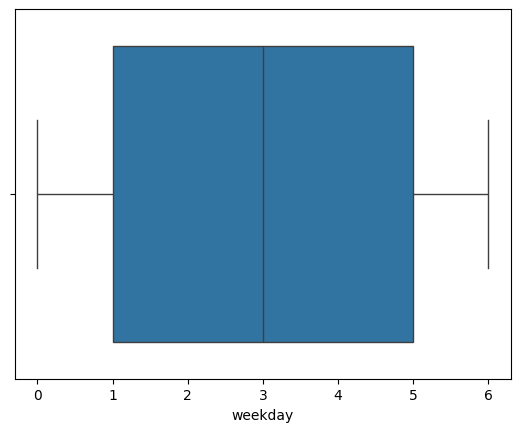

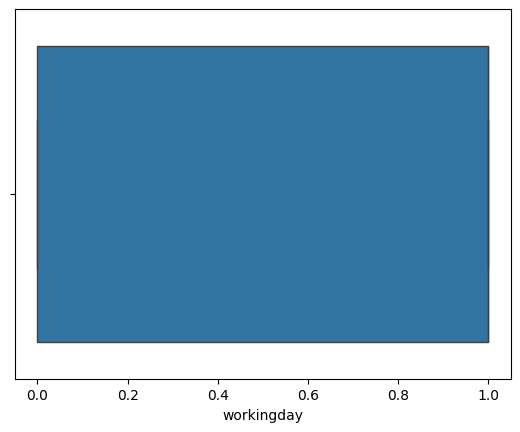

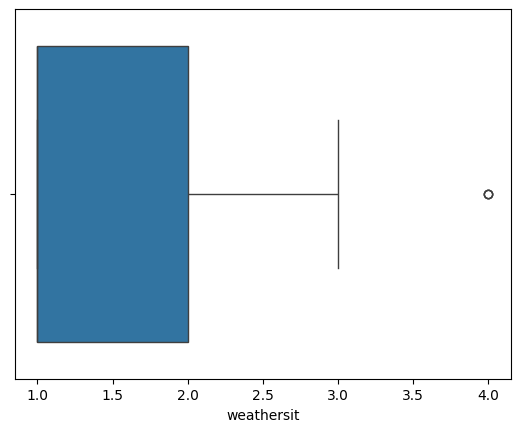

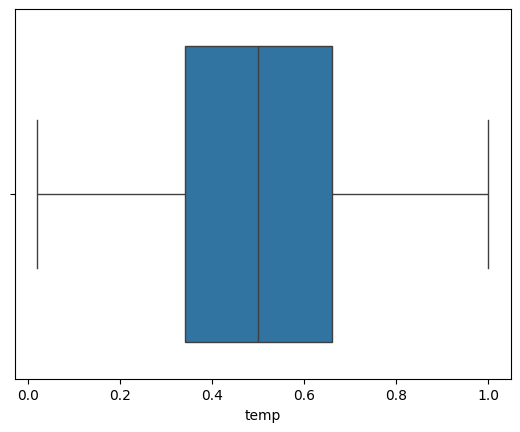

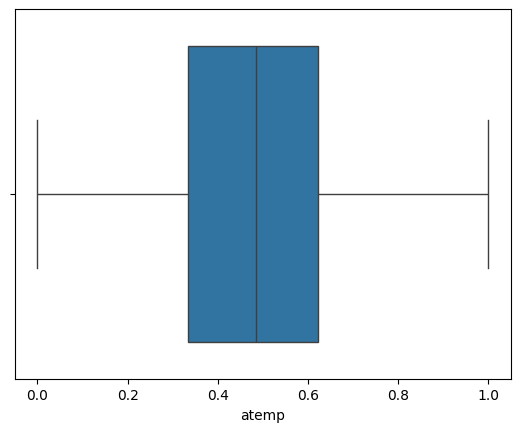

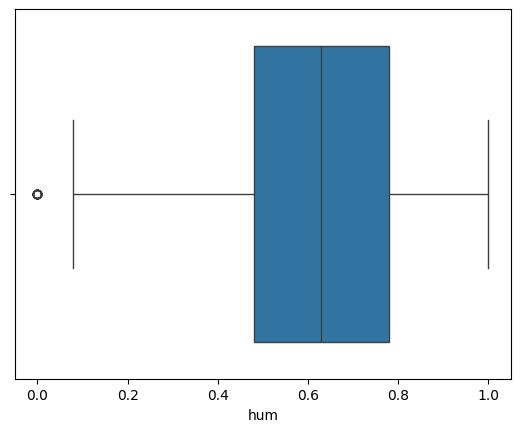

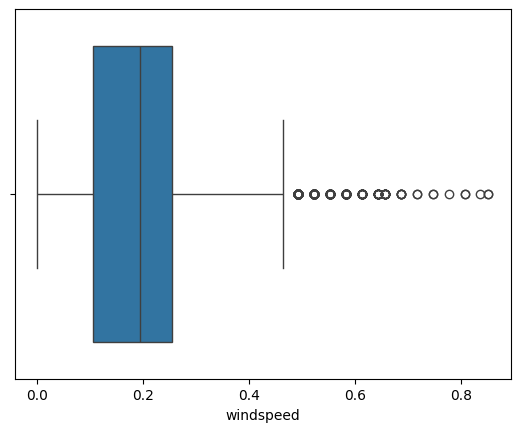

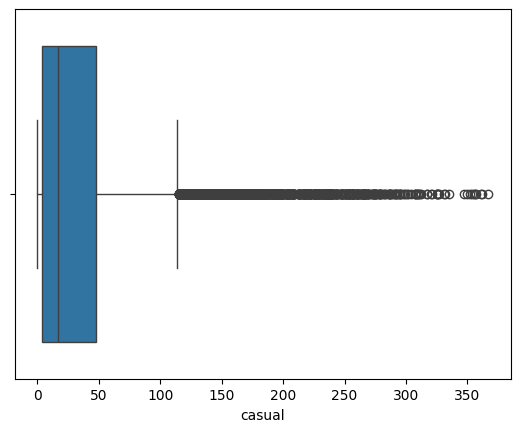

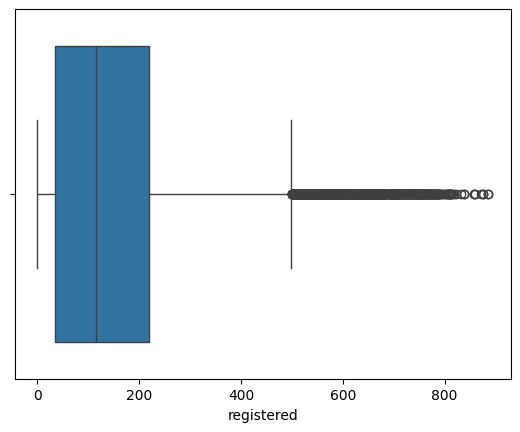

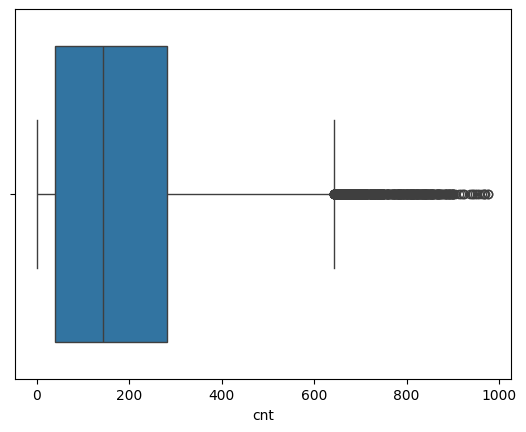

In [11]:
for i in data.select_dtypes(include="number").columns:
    sns.boxplot(data=data,x=i)
    plt.show()

In [12]:
def replace_outliers(df):
    
    for column in df.select_dtypes(include=['number']).columns:
        if column != 'cnt':  # Exclude the target variable
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
 
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
 
           
            data[column] = data[column].apply(
                lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
            )
 
    return df
 

data = replace_outliers(data)

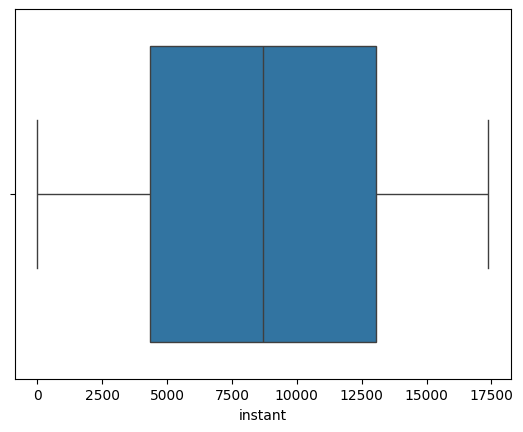

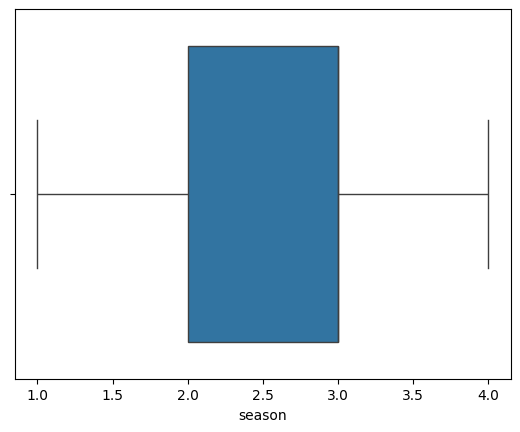

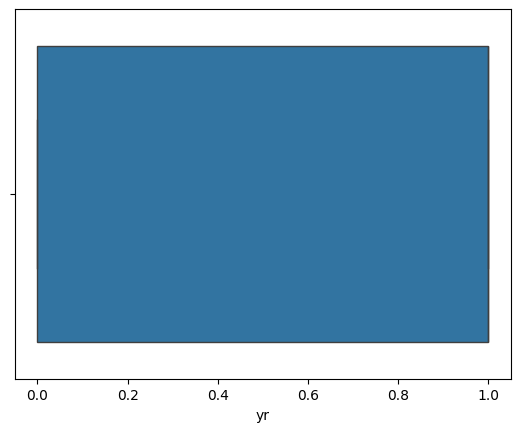

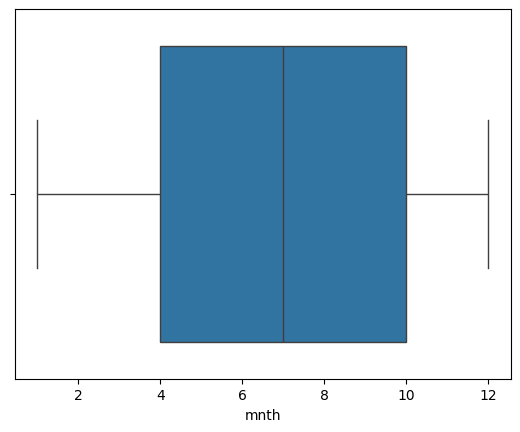

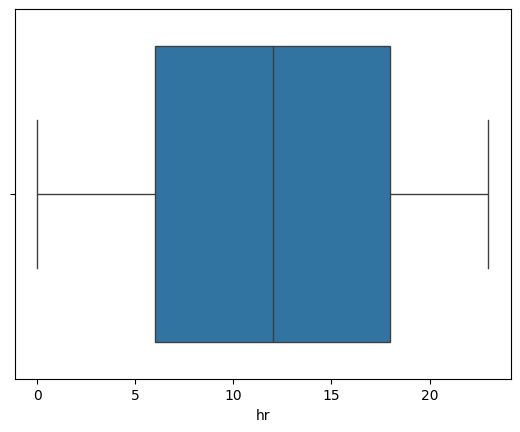

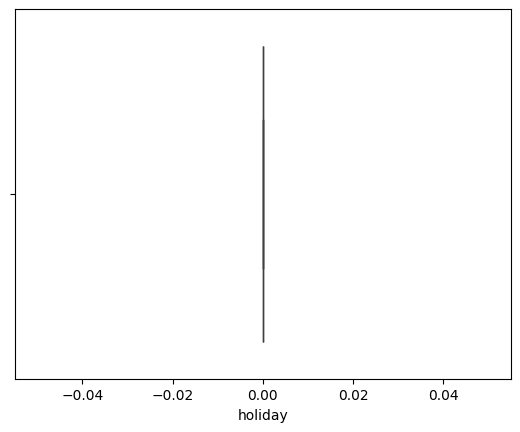

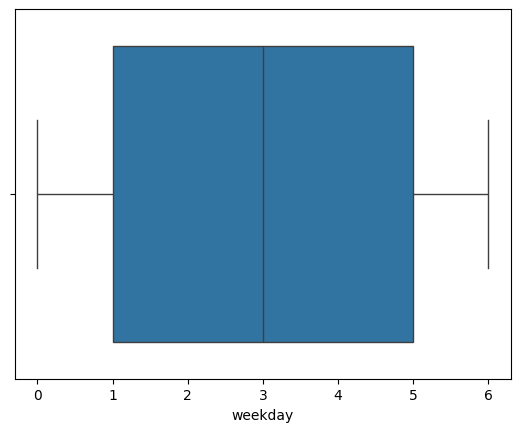

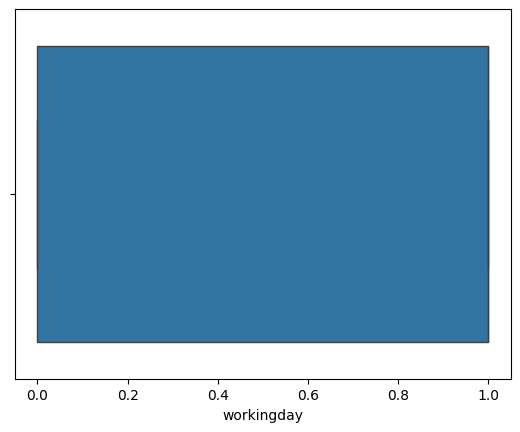

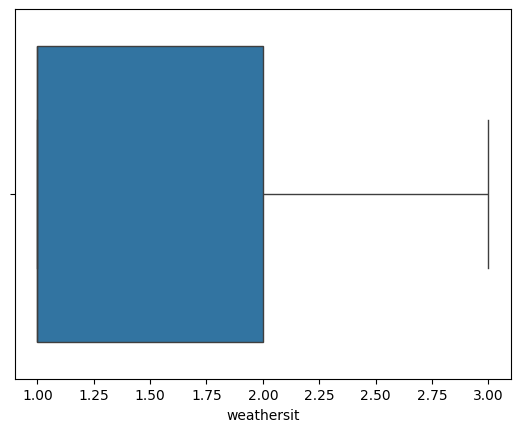

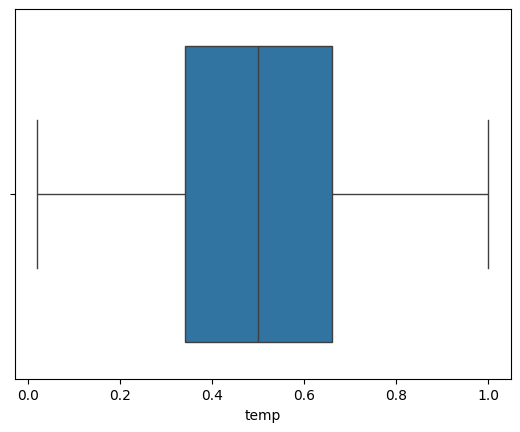

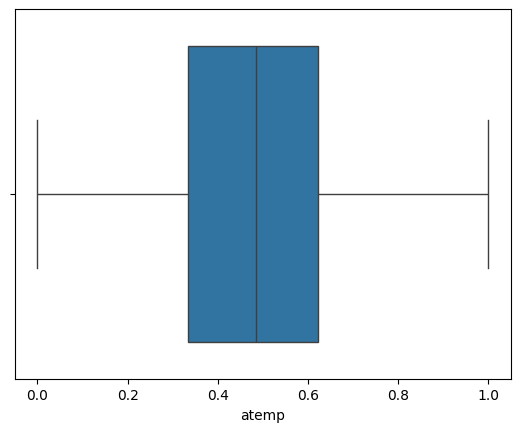

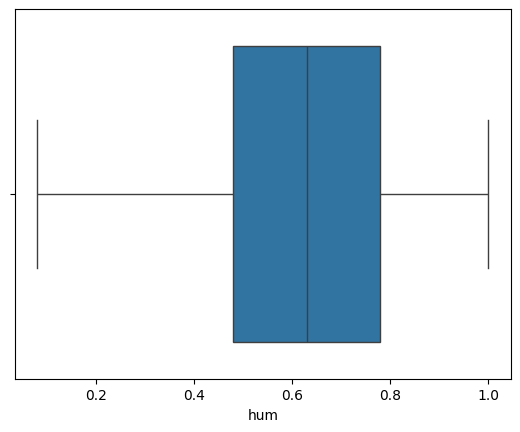

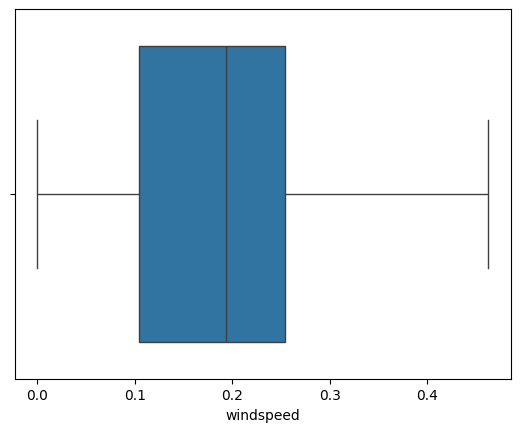

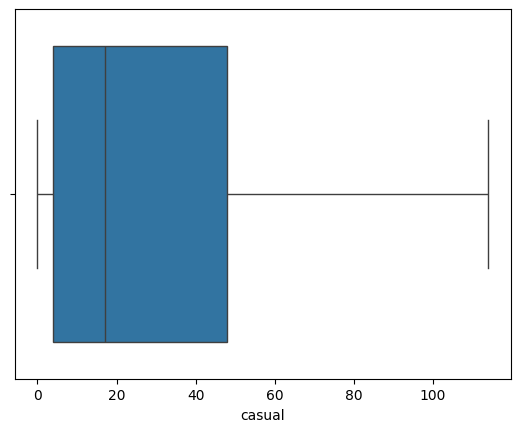

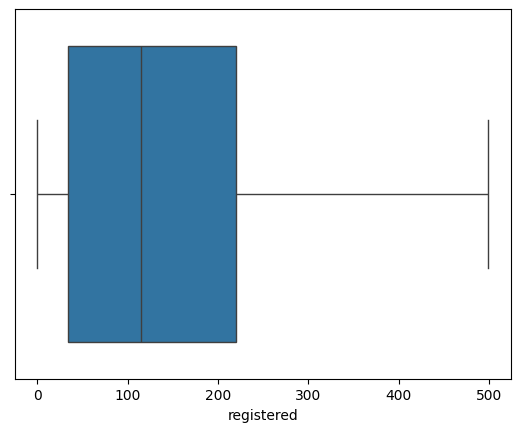

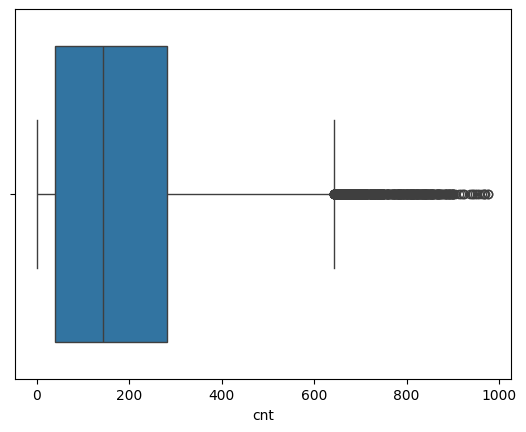

In [13]:
for i in data.select_dtypes(include="number").columns:
    sns.boxplot(data=data,x=i)
    plt.show()

In [14]:
data.iloc[0:1000]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0.0,6,0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16
1,2,2011-01-01,1,0,1,1,0.0,6,0,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40
2,3,2011-01-01,1,0,1,2,0.0,6,0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32
3,4,2011-01-01,1,0,1,3,0.0,6,0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13
4,5,2011-01-01,1,0,1,4,0.0,6,0,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2011-02-14,1,0,2,3,0.0,1,1,1.0,0.34,0.3182,0.46,0.2239,1.0,1.0,2
996,997,2011-02-14,1,0,2,4,0.0,1,1,1.0,0.32,0.3030,0.53,0.2836,0.0,2.0,2
997,998,2011-02-14,1,0,2,5,0.0,1,1,1.0,0.32,0.3030,0.53,0.2836,0.0,3.0,3
998,999,2011-02-14,1,0,2,6,0.0,1,1,1.0,0.34,0.3030,0.46,0.2985,1.0,25.0,26


In [15]:
type("dteday")

str

In [16]:
data=data.drop(columns=["instant","dteday"])

In [17]:
data

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0.0,6,0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16
1,1,0,1,1,0.0,6,0,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40
2,1,0,1,2,0.0,6,0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32
3,1,0,1,3,0.0,6,0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13
4,1,0,1,4,0.0,6,0,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0.0,1,1,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119
17375,1,1,12,20,0.0,1,1,2.0,0.26,0.2576,0.60,0.1642,8.0,81.0,89
17376,1,1,12,21,0.0,1,1,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90
17377,1,1,12,22,0.0,1,1,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61


In [18]:
from sklearn.preprocessing import StandardScaler

features=["temp","atemp","hum","windspeed"]
scaler=StandardScaler()
data[features]=scaler.fit_transform(data[features])

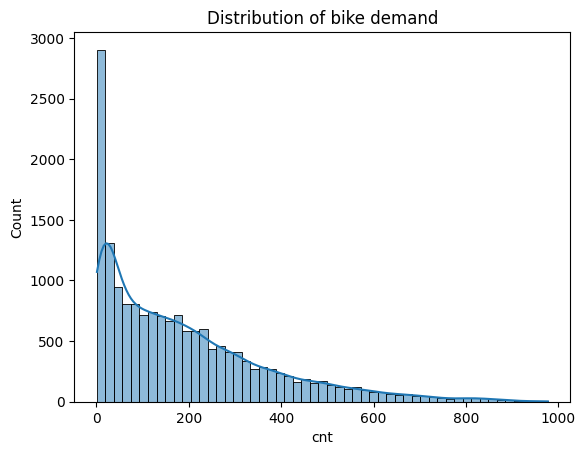

In [19]:
sns.histplot(data["cnt"],kde=True)
plt.title("Distribution of bike demand")
plt.show()

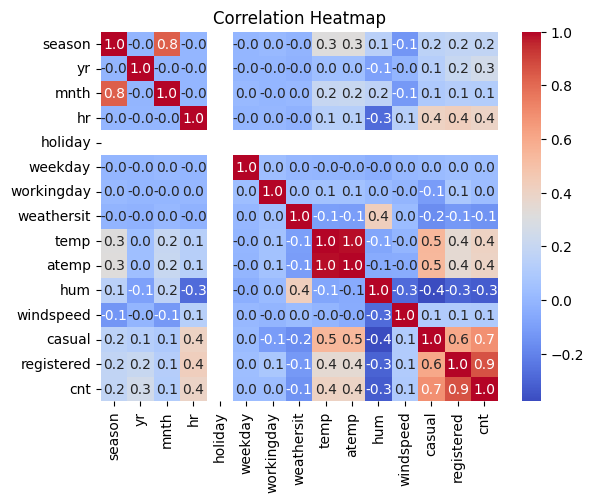

In [20]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split


X = data[['season', 'yr', 'mnth', 'hr', 'weekday', 'workingday','weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual','registered']]
y = data['cnt']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [22]:
X_train.shape

(13903, 13)

In [23]:
X_test.shape

(3476, 13)

In [24]:
y_train.shape

(13903,)

In [25]:
y_test.shape

(3476,)

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


lr = LinearRegression()
ri=Ridge()
la=Lasso()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()


lr.fit(X_train, y_train)
ri.fit(X_train, y_train)
la.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score , accuracy_score

# Predict
y_pred_lr = lr.predict(X_test)
y_pred_ri=ri.predict(X_test)
y_pred_la=la.predict(X_test)

y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [28]:
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2_lr = r2_score(y_test, y_pred_lr)
print(mae)
print(mse)
print(rmse)
print(r2_lr)

43.33136409423165
6924.606388409983
83.21421986902229
0.7883928287471826


In [29]:
mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2_dt = r2_score(y_test, y_pred_dt)
print(mae)
print(mse)
print(rmse)
print(r2_dt)

6.835155350978136
558.9145569620254
23.641373838295127
0.9829202814229687


In [30]:
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2_rf = r2_score(y_test, y_pred_rf)
print(mae)
print(mse)
print(rmse)
print(r2_rf)

5.124042002301495
324.94418017836597
18.026208147538018
0.9900701188015976


In [31]:
mae = mean_absolute_error(y_test, y_pred_ri)
mse = mean_squared_error(y_test, y_pred_ri)
rmse = np.sqrt(mse)
r2_ri = r2_score(y_test, y_pred_ri)
print(mae)
print(mse)
print(rmse)
print(r2_ri)

43.33001114631204
6924.613926627163
83.2142651630546
0.7883925983888455


In [32]:
mae = mean_absolute_error(y_test, y_pred_la)
mse = mean_squared_error(y_test, y_pred_la)
rmse = np.sqrt(mse)
r2_la = r2_score(y_test, y_pred_la)
print(mae)
print(mse)
print(rmse)
print(r2_la)

42.54251404809676
6943.953567576692
83.33038802007759
0.7878016035387664


In [33]:
import pickle

with open('bike_sharing_model.pkl', 'wb') as f:
    pickle.dump(rf, f)  

In [34]:
data.registered.max()

np.float64(499.0)

In [35]:
data.registered.min()

np.float64(0.0)